In [1]:
# Viz Samir

# imports

import os, sys
import numpy as np
import SimpleITK as sitk

from helpers_general import sitk2np, np2sitk, round_tuple, lrange, get_roi_range
from helpers_preprocess import mask2bbox, print_bbox, get_data_dict, folder2objs
from helpers_metrics import compute_dice_coefficient, compute_coverage_coefficient
from helpers_viz import viz_axis

# auto-reload when local helper fns change
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [9]:
# Load Data

PROJ_PATH = "."

# Folders containing MR train data
train_path = f"{PROJ_PATH}/train_data/train_data"
train_data_dict = get_data_dict(train_path)

# print train data dict
print(f"Train data folders: ", \
      *sorted([int(p) for p in os.listdir(train_path)]), sep="\n")

print(f"Training data: key = train folder, value = full path to (segm obj, nii file)\n")
for folder_name, (obj_path, nii_path) in train_data_dict.items():
    print(f"Folder {folder_name}: ", "\n\t", obj_path, "\n\t", nii_path, "\n")
#print(*list(train_data_dict.items()), sep="\n")

Train data folders: 
50002
50003
50004
50005
50006
50007
50008
50009
50010
50011
50012
50013
50014
50015
50016
50017
50019
50020
50022
50023
50024
50025
50026
50027
50028
50029
50030
50031
50032
50033
50034
50035
50036
50037
50038
50039
50040
50041
50042
50043
50044
50045
50046
50047
50048
50049
50455
50456
50457
50458
50459
50460
50461
50462
50463
50464
Training data: key = train folder, value = full path to (segm obj, nii file)

Folder 50049:  
	 ./train_data/train_data/50049/Segmentation.obj 
	 ./train_data/train_data/50049/MP-RAGE/2000-01-01_00_00_00.0/S164545/ABIDE_50049_MRI_MP-RAGE_br_raw_20120830165423769_S164545_I328548.nii 

Folder 50455:  
	 ./train_data/train_data/50455/Segmentation.obj 
	 ./train_data/train_data/50455/MP-RAGE/2000-01-01_00_00_00.0/S165455/ABIDE_50455_MRI_MP-RAGE_br_raw_20120831000745302_S165455_I329465.nii 

Folder 50458:  
	 ./train_data/train_data/50458/Segmentation.obj 
	 ./train_data/train_data/50458/MP-RAGE/2000-01-01_00_00_00.0/S165212/ABIDE_50458_MRI

### Viz MR

Preproccessing makes isotropic.

In [10]:
# isotropic preprocessing param
iso_spacing      = (1,1,1)
iso_interpolator = sitk.sitkLinear # sitk.sitkBSline

In [15]:
# set fixed MR
folder = "50002"
obj, mask_obj = folder2objs(folder, train_data_dict, iso_spacing, iso_interpolator)

print("#"*10, f"MR", "#"*10)
print(f"Shape: {obj.GetSize()}")
print(f"Spacing: {round_tuple(obj.GetSpacing())}")
print(f"Orientation: {round_tuple(obj.GetDirection())}")
print("#"*10, f"ROI", "#"*10)
mask_arr = sitk2np(mask_obj)
bbox_coords = mask2bbox(mask_arr)
print_bbox(*bbox_coords)

########## MR ##########
Shape: (185, 269, 269)
Spacing: (1.0, 1.0, 1.0)
Orientation: (1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
########## ROI ##########
Bbox coords: (74, 91, 107) to (112, 119, 127). Size: 38, 28, 20.
Bounding box coord: from location (91, 107) of slice 74 to location (119, 127) of slice 112.


In [39]:
folder_name = "50002"
segm_path, file = train_data_dict[folder_name]
samir_obj        = sitk.ReadImage(file)

print(samir_obj.GetDirection())

(1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)


In [40]:
for key in samir_obj.GetMetaDataKeys():
    print(key, samir_obj.GetMetaData(key), "\n")

ITK_FileNotes FSL4.1 

ITK_original_direction [UNKNOWN_PRINT_CHARACTERISTICS]
 

ITK_original_spacing [UNKNOWN_PRINT_CHARACTERISTICS]
 

aux_file  

bitpix 16 

cal_max 0 

cal_min 0 

datatype 4 

descrip FSL4.1 

dim[0] 3 

dim[1] 176 

dim[2] 256 

dim[3] 256 

dim[4] 1 

dim[5] 1 

dim[6] 1 

dim[7] 1 

dim_info 0 

intent_code 0 

intent_name  

intent_p1 0 

intent_p2 0 

intent_p3 0 

nifti_type 1 

pixdim[0] 0 

pixdim[1] 1.05 

pixdim[2] 1.05078 

pixdim[3] 1.05078 

pixdim[4] 0 

pixdim[5] 0 

pixdim[6] 0 

pixdim[7] 0 

qform_code 1 

qform_code_name NIFTI_XFORM_SCANNER_ANAT 

qoffset_x 94.7806 

qoffset_y -130.66 

qoffset_z -143.096 

quatern_b 0 

quatern_c 1 

quatern_d 0 

scl_inter 0 

scl_slope 1 

sform_code 1 

sform_code_name NIFTI_XFORM_SCANNER_ANAT 

slice_code 0 

slice_duration 0 

slice_end 0 

slice_start 0 

srow_x -1.05 0 0 94.7806 

srow_y 0 1.05078 0 -130.66 

srow_z 0 0 1.05078 -143.096 

toffset 0 

vox_offset 352 

xyzt_units 10 



In [41]:
folder_name = "50456"
segm_path, file = train_data_dict[folder_name]
hollon_obj        = sitk.ReadImage(file)

print(round_tuple(samir_obj.GetDirection(), d=1))

(1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)


In [45]:
for key in hollon_obj.GetMetaDataKeys():
    print(key, "hollon ", hollon_obj.GetMetaData(key), "samir ", samir_obj.GetMetaData(key), "\n")

ITK_FileNotes hollon   samir  FSL4.1 

ITK_original_direction hollon  [UNKNOWN_PRINT_CHARACTERISTICS]
 samir  [UNKNOWN_PRINT_CHARACTERISTICS]
 

ITK_original_spacing hollon  [UNKNOWN_PRINT_CHARACTERISTICS]
 samir  [UNKNOWN_PRINT_CHARACTERISTICS]
 

aux_file hollon   samir   

bitpix hollon  16 samir  16 

cal_max hollon  0 samir  0 

cal_min hollon  0 samir  0 

datatype hollon  4 samir  4 

descrip hollon   samir  FSL4.1 

dim[0] hollon  3 samir  3 

dim[1] hollon  160 samir  176 

dim[2] hollon  480 samir  256 

dim[3] hollon  512 samir  256 

dim[4] hollon  1 samir  1 

dim[5] hollon  1 samir  1 

dim[6] hollon  1 samir  1 

dim[7] hollon  1 samir  1 

dim_info hollon  0 samir  0 

intent_code hollon  0 samir  0 

intent_name hollon   samir   

intent_p1 hollon  0 samir  0 

intent_p2 hollon  0 samir  0 

intent_p3 hollon  0 samir  0 

nifti_type hollon  1 samir  1 

pixdim[0] hollon  0 samir  0 

pixdim[1] hollon  1.2 samir  1.05 

pixdim[2] hollon  0.5 samir  1.05078 

pixdim[3] h

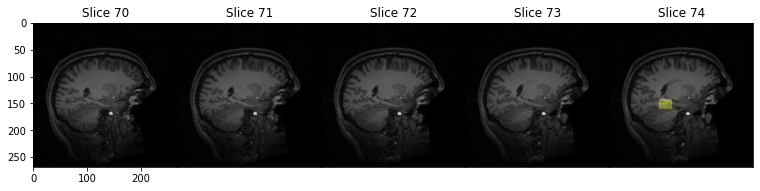

In [18]:
# Bbox is between 78-107 along axis 0.
slice_range = lrange(70,75)
viz_axis(sitk2np(obj), \
        bin_mask_arr = mask_arr, color1 = "yellow", alpha1=0.3,
        slices=slice_range, fixed_axis=0, \
        axis_fn = np.rot90, \
        grid = [1, 5], hspace=0.3, fig_mult=2)

In [20]:
def make_affine2(simpleITKImage):
    # get affine transform in LPS
    c = [simpleITKImage.TransformContinuousIndexToPhysicalPoint(p)
         for p in ((1, 0, 0),
                   (0, 1, 0),
                   (0, 0, 1),
                   (0, 0, 0))]
    c = np.array(c)
    affine = np.concatenate([
        np.concatenate([c[0:3] - c[3:], c[3:]], axis=0),
        [[0.], [0.], [0.], [1.]]
    ], axis=1)
    affine = np.transpose(affine)
    # convert to RAS to match nibabel
    #affine = np.matmul(np.diag([-1., -1., 1., 1.]), affine)
    return affine

# Seg2mask
def seg2mask2(image_obj, segm_obj):
    dims = image_obj.GetSize()
    aff     = make_affine2(image_obj)
    idx_pts = np.indices(dims[::-1], dtype=np.uint16).T.reshape(-1,3)[:,[2,1,0]]
    physical_pts = (np.dot(aff[:3,:3], idx_pts.T) + aff[:3,3:4]).T 
    return (Delaunay(segm_obj.points).find_simplex(physical_pts) >= 0).reshape(dims)


In [21]:
def folder2objs2(folder_name, train_data_dict, iso_spacing = (1, 1, 1), iso_interpolator = sitk.sitkLinear):
    segm_path, file = train_data_dict[folder_name]

    # compile MR obj from nii file using Simple ITK reader
    obj        = sitk.ReadImage(file)
    segm       = meshio.read(segm_path)
    mask_arr   = seg2mask2(obj, segm)
    
    # preprocess
    
    # 1. isotropic
    iso_obj       = get_isotropic(obj, iso_spacing, iso_interpolator)
    iso_mask_obj  = get_isotropic(np2sitk(mask_arr, obj), iso_spacing, iso_interpolator)
    
    return iso_obj, iso_mask_obj

In [25]:
# meshio for 3DSlicer segm obj
import meshio

# numpy to SITK conversion
import numpy     as np
import SimpleITK as sitk
from helpers_general import np2sitk, sitk2np

# segmentation
from scipy.spatial   import Delaunay

# isotropic
def get_isotropic(obj, new_spacing = (1,1,1), interpolator=sitk.sitkLinear):
  """ returns obj w/ 1mm isotropic voxels """

  original_size    = obj.GetSize()
  original_spacing = obj.GetSpacing()

  min_spacing = min(new_spacing)

  new_size = [int(round(osz*ospc/min_spacing)) for osz,ospc in zip(original_size, original_spacing)]

  return sitk.Resample(obj, new_size, sitk.Transform(), interpolator,
                         obj.GetOrigin(), new_spacing, obj.GetDirection(), 0,
                         obj.GetPixelID())


In [26]:
# set fixed MR
folder = "50002"
obj, mask_obj = folder2objs2(folder, train_data_dict, iso_spacing, iso_interpolator)

print("#"*10, f"MR", "#"*10)
print(f"Shape: {obj.GetSize()}")
print(f"Spacing: {round_tuple(obj.GetSpacing())}")
print(f"Orientation: {round_tuple(obj.GetDirection())}")
print("#"*10, f"ROI", "#"*10)
mask_arr = sitk2np(mask_obj)
bbox_coords = mask2bbox(mask_arr)
print_bbox(*bbox_coords)

########## MR ##########
Shape: (185, 269, 269)
Spacing: (1.0, 1.0, 1.0)
Orientation: (1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
########## ROI ##########
Bbox coords: (78, 142, 107) to (115, 170, 127). Size: 37, 28, 20.
Bounding box coord: from location (142, 107) of slice 78 to location (170, 127) of slice 115.


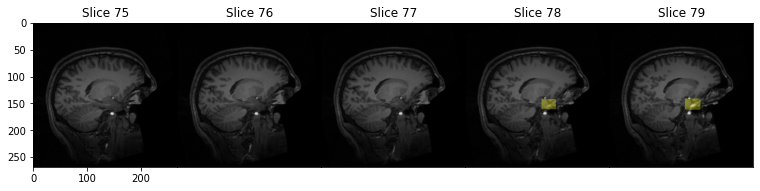

In [27]:
# Bbox is between 78-107 along axis 0.
slice_range = lrange(75,80)
viz_axis(sitk2np(obj), \
        bin_mask_arr = mask_arr, color1 = "yellow", alpha1=0.3,
        slices=slice_range, fixed_axis=0, \
        axis_fn = np.rot90, \
        grid = [1, 5], hspace=0.3, fig_mult=2)